# Titanic Data

# Questions I want to ask:

1. Does gender affect survival rate?
2. Does port of embarkation affect survival rate?
3. Are children (age < 18) more likely to survive than adults?
4. What are the survival rates for first, second and third class passengers?
5. Does the ticket class for children affect their survival rate?
6. Does passenger fare within each ticket class affect survival?



## Load data from csv

In [1]:
import pandas as pd
titanic_data = pd.read_csv('titanic_data.csv')
print titanic_data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Survival rate for both sexes

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0xc5c4148>, <matplotlib.axis.XTick at 0xc5b1a08>],
 <a list of 2 Text xticklabel objects>)

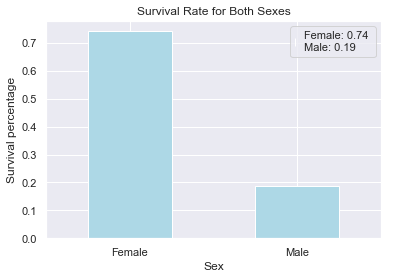

In [2]:
# survival rate on y axis
# gender (0 or 1) on x axis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%pylab inline

''' Survival rate for both sexes'''

grouped_sex = titanic_data.groupby('Sex')

grouped_sex['Survived'].mean().plot(kind='bar', color='lightblue')

plt.title('Survival Rate for Both Sexes')
plt.ylabel('Survival percentage')
sex_stats = grouped_sex['Survived'].mean().round(2)
# print grouped_sex['Survived'].mean()
plt.legend(['Female: {} \nMale: {}'.format(sex_stats[0], sex_stats[1])], handlelength=0)
plt.xticks((0, 1), ('Female', 'Male'), rotation=0)


Data shows Females were almost 4 times more likely to survive than males.

## Survival Rate for Embarkation Port

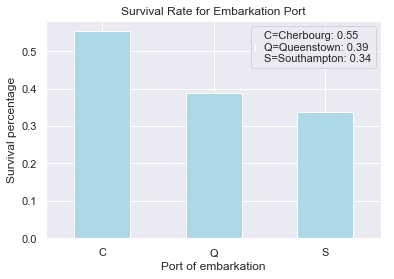

In [3]:
'''Survival Rate for Embarkation Port'''

grouped_port = titanic_data.groupby('Embarked')

grouped_port['Survived'].mean().plot(kind='bar', color='lightblue')

plt.title('Survival Rate for Embarkation Port')
plt.xlabel('Port of embarkation')
plt.ylabel('Survival percentage')
plt.xticks(rotation=0)
port_stats = grouped_port['Survived'].mean().round(2)
# print grouped_port['Survived'].mean()
plt.legend(['C=Cherbourg: {} \nQ=Queenstown: {} \nS=Southampton: {}'.format(port_stats[0], port_stats[1], port_stats[2])], handlelength=0)

Data shows passengers had different survival rates depending on the station they embarked from.

To find out a possible reason why, the number of passengers embarking for each port is analysed 

          First Class  Second Class  Third Class
Embarked                                        
C                  85            17           66
Q                   2             3           72
S                 127           164          353
          First Class  Second Class  Third Class
Embarked                                        
C            0.505952      0.101190     0.392857
Q            0.025974      0.038961     0.935065
S            0.197205      0.254658     0.548137


([<matplotlib.axis.XTick at 0xc989d08>,
 <a list of 3 Text xticklabel objects>)

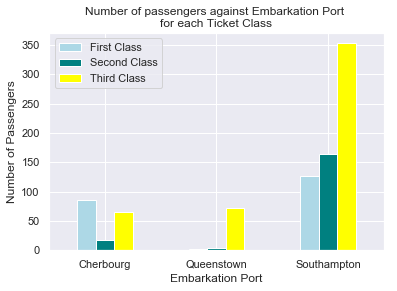

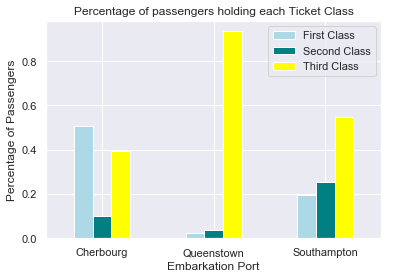

In [4]:
# is_first = titanic_data['Pclass'] == 1
# # print is_first.head()
# titanic_first = titanic_data[is_first]
# # print titanic_first.head()

# grouped_port_first = titanic_first.groupby('Embarked')

# grouped_port_first['Survived'].mean().plot(kind='bar', color='lightblue', stacked=False)

# plt.bar(grouped_port_first['Survived'].mean().keys(), [grouped_port_first['Survived'].mean(), grouped_port_sec['Survived'].mean()])

'''Number of passengers for Embarkation Port for each Ticket Class'''

def titanic_chosen_class(chosen_class):
    ''' Function takes in ticket class number (First Class, Second Class or Third Class) and
        returns of number of passengers for that class
        '''
    is_chosen_class = titanic_data['Pclass'] == chosen_class
    titanic_chosen_class = titanic_data[is_chosen_class]
#     print len(titanic_chosen_class['PassengerId']) # theres only 216 passengers in class 1
    return titanic_chosen_class.groupby('Embarked')['PassengerId'].size()
  
# print titanic_chosen_class(1)    
# print titanic_chosen_class(2)
# print titanic_chosen_class(3)
    
new_df = pd.DataFrame([])
def create_class_plot(a=1, b=2, c=3):
    ''' Function takes in all three ticket classes (First class, Second Class and Third Class) and
        returns a dataframe containing passenger size for all
    '''
    new_df['First Class'] = titanic_chosen_class(1)
    new_df['Second Class'] = titanic_chosen_class(2)
    new_df['Third Class'] = titanic_chosen_class(3)
    return new_df

print create_class_plot()

class_percent = create_class_plot().div(create_class_plot().sum(axis='columns'), axis='index')
print class_percent

create_class_plot().plot(kind='bar', color=['lightblue', 'teal', 'yellow'])

plt.title('Number of passengers against Embarkation Port \nfor each Ticket Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.xticks((0, 1, 2), ('Cherbourg', 'Queenstown', 'Southampton'), rotation=0)

class_percent.plot(kind='bar', color=['lightblue', 'teal', 'yellow'])

plt.title('Percentage of passengers holding each Ticket Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Percentage of Passengers')
plt.xticks((0, 1, 2), ('Cherbourg', 'Queenstown', 'Southampton'), rotation=0)


Here, the data shows that passengers embarking from Cherbourg were mostly first class ticket holders, and passengers embarking from Queenstown and Southampton were mostly third class ticket holders.

The second graph shows the same data by percentage.

## Survival Rate for Adults and Children

is_child
False    0.361183
True     0.539823
Name: Survived, dtype: float64


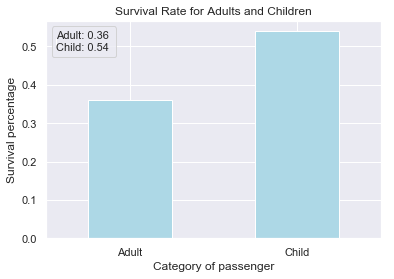

In [5]:
''''Survival Rate for Adults and Children'''

titanic_data['is_child'] = titanic_data['Age'] < 18

grouped_child = titanic_data.groupby('is_child')

grouped_child['Survived'].mean().plot(kind='bar', color='lightblue')

plt.title('Survival Rate for Adults and Children')
plt.xlabel('Category of passenger')
plt.ylabel('Survival percentage')
plt.xticks((False, True), ('Adult', 'Child'), rotation=0)
child_stats = grouped_child['Survived'].mean().round(2)
print grouped_child['Survived'].mean()
plt.legend(['Adult: {} \nChild: {}'.format(child_stats[0], child_stats[1])], handlelength=0, handletextpad=0)

Data shows that children are more likely to survive than adults.

54% compared to 36%

## Survival Rate for Each Ticket Class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


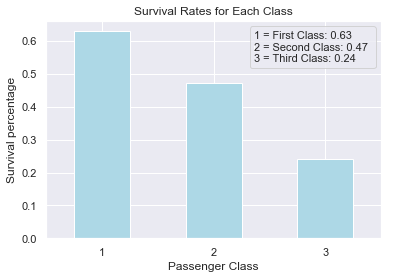

In [6]:
'''Survival Rate for Each Ticket Class '''

grouped_class = titanic_data.groupby('Pclass')

grouped_class['Survived'].mean().plot(kind='bar', color='lightblue')

plt.title('Survival Rates for Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival percentage')
plt.xticks(rotation=0)
class_stats = grouped_class['Survived'].mean().round(2)
print grouped_class['Survived'].mean()
plt.legend(['1 = First Class: {} \n2 = Second Class: {} \n3 = Third Class: {}'.format(class_stats[1], class_stats[2], class_stats[3])], handlelength=0, handletextpad=0, ncol=2)
# plt.legend([['first'], ['adsf']], handlelength=0, handletextpad=0, ncol=3)

### Survival rate for children in each ticket class

Pclass
1    0.916667
2    0.913043
3    0.371795
Name: Survived, dtype: float64


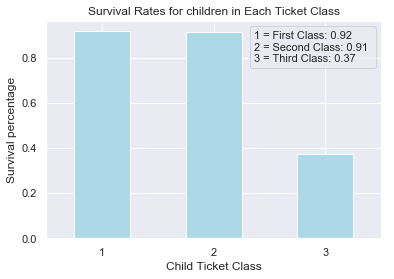

In [8]:
'''Survival Rate for children in Each Ticket Class '''

is_child = titanic_data['is_child']

titanic_child = titanic_data[is_child]

grouped_class = titanic_child.groupby('Pclass')

grouped_class['Survived'].mean().plot(kind='bar', color='lightblue')

plt.title('Survival Rates for children in Each Ticket Class')
plt.xlabel('Child Ticket Class')
plt.ylabel('Survival percentage')
plt.xticks(rotation=0)
class_stats = grouped_class['Survived'].mean().round(2)
print grouped_class['Survived'].mean()
plt.legend(['1 = First Class: {} \n2 = Second Class: {} \n3 = Third Class: {}'.format(class_stats[1], class_stats[2], class_stats[3])], handlelength=0, handletextpad=0, ncol=2)

Data shows that children with first and second class tickets had an equal survival rate.

In comparison children with third class tickets were less than half as likely to survive.

## Survival Rates against Passenger Fares (first class passengers)

Pclass
1    0.916667
2    0.913043
3    0.371795
Name: Survived, dtype: float64


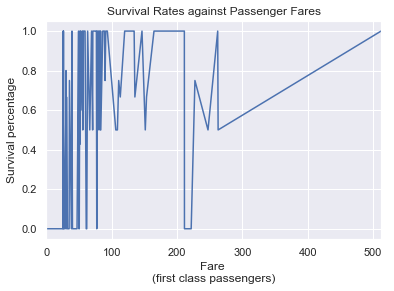

In [9]:
'''Survival Rates against Passenger Fares (first class passengers)'''

is_first = titanic_data['Pclass'] == 1
# print is_first.head()
titanic_first = titanic_data[is_first]
# print titanic_first.head()


grouped_fare = titanic_first.groupby('Fare')

grouped_fare['Survived'].mean().plot(kind='line')

plt.title('Survival Rates against Passenger Fares') #for first class passengers')
plt.xlabel('Fare \n(first class passengers)')
plt.ylabel('Survival percentage')

print grouped_class['Survived'].mean()

# print titanic_data['Fare'].max()
# NO CORRELATION

Data shows no clear correlation. 

Pasenger fares within the first class passengers did not affect survival.

Graph also shows an outlier where a passanger paid over 500